In [1]:
from codecarbon import EmissionsTracker
try:
    tracker.stop()  # Intenta detener cualquier instancia previa de codecarbon
except:
    pass  # Ignora el error si no hay ninguna instancia activa
# Iniciar el medidor
tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 21:09:49] [setup] RAM Tracking...
[codecarbon INFO @ 21:09:49] [setup] CPU Tracking...
[codecarbon WARNING @ 21:09:53] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 21:09:54] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 21:09:54] [setup] GPU Tracking...
[codecarbon INFO @ 21:09:54] No GPU found.
[codecarbon INFO @ 21:09:54] >>> Tracker's metadata:
[codecarbon INFO @ 21:09:54]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 21:09:54]   Python version: 3.9.12
[codecarbon INFO @ 21:09:54]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 21:09:54]   Available RAM : 8.000 GB
[codecarbon INFO @ 21:09:54]   CPU count: 8
[codecarbon INFO @ 21:09:54]   CPU model: Apple M1
[codecarbon INFO @ 21:09:54]   GPU count: None
[codecarbon INFO @ 21:09:54]   GPU model: None
[codecarbon INFO @ 21:09:57] Saving emissions data to

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

In [3]:
%pip install --upgrade kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
data = '/Users/lucia/.cache/kagglehub/datasets/trisha2094/weatheraus/versions/1/weatherAUS.csv'

df = pd.read_csv(data)

PREPROCESADO DE DATOS

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
df.shape

(142193, 24)

In [7]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [9]:
#imbalanced data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [11]:
df.drop(['RISK_MM'], axis=1, inplace=True)

CATEGORICAL VARIABLES

In [12]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [13]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [14]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


In [15]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964

In [16]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/float(len(df)))

2013-12-01    0.000345
2014-01-09    0.000345
2014-01-11    0.000345
2014-01-12    0.000345
2014-01-13    0.000345
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.024038
Sydney              0.023468
Perth               0.022455
Darwin              0.022448
Hobart              0.022420
Brisbane            0.022230
Adelaide            0.021731
Bendigo             0.021337
Townsville          0.021330
AliceSprings        0.021316
MountGambier        0.021309
Launceston          0.021295
Ballarat            0.021295
Albany              0.021211
Albury              0.021175
PerthAirport        0.021161
MelbourneAirport    0.021161
Mildura             0.021147
SydneyAirport       0.021133
Nuriootpa           0.021112
Sale                0.021098
Watsonia            0.021091
Tuggeranong         0.021084
Portland            0.021070
Woomera   

In [17]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


DATE

In [18]:
df['Date'].dtypes

dtype('O')

In [19]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [20]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [21]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [22]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [23]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [24]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [25]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


LOCATION

In [26]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [27]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [28]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [29]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


WINDGUSTDIR

In [30]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [31]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [32]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [33]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


WINDRI9AM

In [34]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [35]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [36]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [37]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


WINDIR3PM

In [38]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [39]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [40]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [41]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


RAINTODAY

In [42]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [43]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [44]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [45]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


NUMERICAL VARIABLES

In [46]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [47]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [48]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [49]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

Text(0, 0.5, 'WindSpeed3pm')

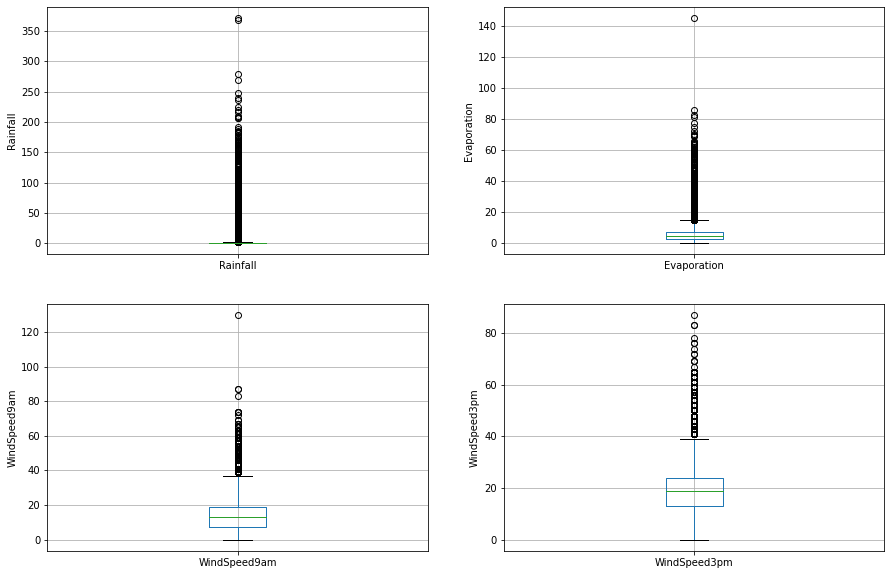

In [50]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

The above boxplots confirm that there are lot of outliers in these variables.

Check the distribution of variables

Text(0, 0.5, 'RainTomorrow')

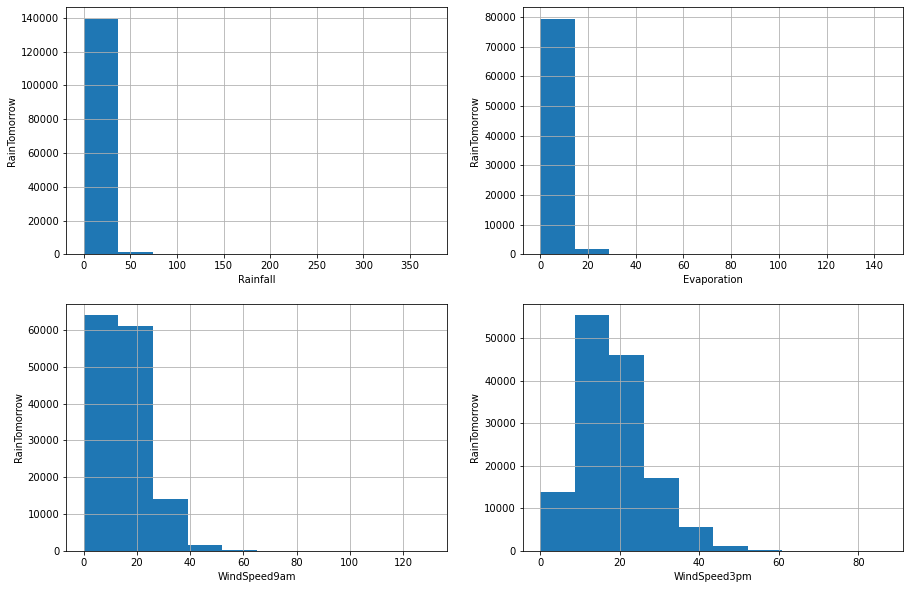

In [51]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [52]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [53]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [54]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [55]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


DIVIDING IN TRAIN AND SET

In [56]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
#20% test, 80% training
X_train.shape, X_test.shape

((113754, 24), (28439, 24))

In [59]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [60]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [61]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [62]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [63]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)     

In [64]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [65]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [66]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [67]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [68]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [69]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()


(57.0, 57.0)

In [70]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [71]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [72]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

NORMALIZACIÓN

In [73]:
cols = X_train.columns

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [75]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [76]:
X_test = pd.DataFrame(X_test, columns=[cols])


In [77]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.608076,0.638941,0.00,0.165138,0.765517,0.209302,0.200000,0.333333,0.63,0.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.356295,0.362949,0.25,0.036697,0.586207,0.310078,0.309091,0.385965,0.80,0.55,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.434679,0.381853,1.00,0.220183,0.586207,0.193798,0.236364,0.157895,0.70,0.61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.536817,0.722117,0.00,0.366972,0.800000,0.271318,0.163636,0.298246,0.40,0.23,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.356295,0.361059,1.00,0.009174,0.503448,0.170543,0.272727,0.228070,0.92,0.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28434,0.581948,0.540643,0.00,0.339450,0.862069,0.240310,0.436364,0.456140,0.57,0.40,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28435,0.603325,0.559546,0.25,0.220183,0.586207,0.286822,0.363636,0.298246,0.52,0.38,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28436,0.365796,0.536862,0.00,0.220183,0.586207,0.193798,0.036364,0.298246,0.57,0.36,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28437,0.679335,0.610586,0.00,0.220183,0.586207,0.209302,0.309091,0.333333,0.90,0.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


MODELO

In [78]:
#We now have X_train dataset ready to be fed into the Logistic Regression classifier
#Let's run SVM with default hyperparameters
#Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[codecarbon INFO @ 21:10:12] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:10:12] Energy consumed for all CPUs : 0.000021 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:10:12] 0.000033 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:10:27] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:10:27] Energy consumed for all CPUs : 0.000042 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:10:27] 0.000067 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:10:42] Energy consumed for RAM : 0.000037 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:10:42] Energy consumed for all CPUs : 0.000063 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:10:42] 0.000100 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:10:57] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:10:57] Energy consumed for all CPUs : 0.000083 kWh. Total CPU Power : 5.0 W
[codecarbon

Model accuracy score with default hyperparameters: 0.8591


Not new value of hyperparameter C because the code took more than 1 day to run

Let's keep original value for c. c=1

Let's try a lineal kernel

In [79]:
#Let's try c=1 and kernel = linear
linear_svc=SVC(kernel='linear', C=1) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

[codecarbon INFO @ 21:25:28] Energy consumed for RAM : 0.000775 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:25:28] Energy consumed for all CPUs : 0.001292 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:25:28] 0.002067 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:25:43] Energy consumed for RAM : 0.000788 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:25:43] Energy consumed for all CPUs : 0.001313 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:25:43] 0.002101 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:25:58] Energy consumed for RAM : 0.000800 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:25:58] Energy consumed for all CPUs : 0.001334 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:25:58] 0.002134 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:25:58] 0.000456 g.CO2eq/s mean an estimation of 14.384038888552139 kg.CO2eq/year
[codecarbon INFO @ 21:26:13] Energy consumed for RAM : 0.000813 kWh. RAM Power : 3.0 W
[codec

Model accuracy score with linear kernel and C=100.0 : 0.8505


In [80]:
#Now, I will compare the train-set and test-set accuracy to check for overfitting.

y_pred_train = linear_svc.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

[codecarbon INFO @ 21:38:13] Energy consumed for RAM : 0.001413 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:38:13] Energy consumed for all CPUs : 0.002355 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:38:13] 0.003768 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:38:28] Energy consumed for RAM : 0.001425 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:38:28] Energy consumed for all CPUs : 0.002376 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:38:28] 0.003801 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:38:43] Energy consumed for RAM : 0.001438 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:38:43] Energy consumed for all CPUs : 0.002397 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:38:43] 0.003835 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:38:58] Energy consumed for RAM : 0.001450 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:38:58] Energy consumed for all CPUs : 0.002418 kWh. Total CPU Power : 5.0 W
[codecarbon

Training-set accuracy score: 0.8476


No overfitting

Polynomial kernel

In [81]:
# instantiate classifier with polynomial kernel and C=1
poly_svc=SVC(kernel='poly', C=1) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[codecarbon INFO @ 21:40:58] Energy consumed for RAM : 0.001550 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:40:58] Energy consumed for all CPUs : 0.002584 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:40:58] 0.004135 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:41:13] Energy consumed for RAM : 0.001563 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:41:13] Energy consumed for all CPUs : 0.002605 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:41:13] 0.004168 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:41:28] Energy consumed for RAM : 0.001575 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:41:28] Energy consumed for all CPUs : 0.002626 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:41:28] 0.004202 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:41:43] Energy consumed for RAM : 0.001588 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:41:43] Energy consumed for all CPUs : 0.002647 kWh. Total CPU Power : 5.0 W
[codecarbon

Model accuracy score with polynomial kernel and C=100 : 0.8603


Sigmoid kernel

In [82]:
# instantiate classifier with sigmoid kernel and C=1
sigmoid_svc100=SVC(kernel='sigmoid', C=1) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[codecarbon INFO @ 21:53:44] Energy consumed for RAM : 0.002188 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:53:44] Energy consumed for all CPUs : 0.003647 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:53:44] 0.005836 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:53:59] Energy consumed for RAM : 0.002201 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:53:59] Energy consumed for all CPUs : 0.003668 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:53:59] 0.005869 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:53:59] 0.000456 g.CO2eq/s mean an estimation of 14.383679558691375 kg.CO2eq/year
[codecarbon INFO @ 21:54:14] Energy consumed for RAM : 0.002213 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 21:54:14] Energy consumed for all CPUs : 0.003689 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 21:54:14] 0.005902 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:54:29] Energy consumed for RAM : 0.002226 kWh. RAM Power : 3.0 W
[codec

Model accuracy score with sigmoid kernel and C=1 : 0.7495


Best accuracy is for polynomial kernel

In [83]:
#Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [84]:
print('Training set score: {:.4f}'.format(poly_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(poly_svc.score(X_test, y_test)))

[codecarbon INFO @ 22:06:44] Energy consumed for RAM : 0.002838 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:06:44] Energy consumed for all CPUs : 0.004731 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:06:44] 0.007569 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:06:59] Energy consumed for RAM : 0.002851 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:06:59] Energy consumed for all CPUs : 0.004752 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:06:59] 0.007603 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:07:14] Energy consumed for RAM : 0.002863 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:07:14] Energy consumed for all CPUs : 0.004773 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:07:14] 0.007636 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:07:29] Energy consumed for RAM : 0.002876 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:07:29] Energy consumed for all CPUs : 0.004794 kWh. Total CPU Power : 5.0 W
[codecarbon

Training set score: 0.8743


[codecarbon INFO @ 22:09:29] Energy consumed for RAM : 0.002976 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:09:29] Energy consumed for all CPUs : 0.004960 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:09:29] 0.007936 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:09:44] Energy consumed for RAM : 0.002988 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:09:44] Energy consumed for all CPUs : 0.004981 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:09:44] 0.007970 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:09:59] Energy consumed for RAM : 0.003001 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:09:59] Energy consumed for all CPUs : 0.005002 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:09:59] 0.008003 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:09:59] 0.000456 g.CO2eq/s mean an estimation of 14.383151794940916 kg.CO2eq/year


Test set score: 0.8603


No overfitting

In [85]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21077   990]
 [ 3262  3110]]

True Positives(TP) =  21077

True Negatives(TN) =  3110

False Positives(FP) =  990

False Negatives(FN) =  3262


<AxesSubplot:>

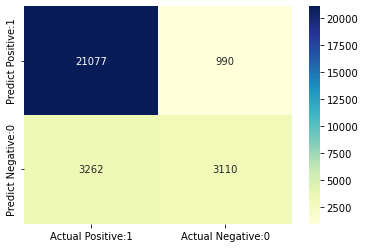

In [86]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22067
         Yes       0.76      0.49      0.59      6372

    accuracy                           0.85     28439
   macro avg       0.81      0.72      0.75     28439
weighted avg       0.84      0.85      0.84     28439



In [88]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [89]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8505


In [90]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8660


In [91]:
y_test_bin = y_test.map({'Yes': 1, 'No': 0})

In [92]:
y_test_bin

86232     0
57576     0
124071    0
117955    0
133468    0
         ..
35297     0
48566     0
131684    0
89915     0
66813     1
Name: RainTomorrow, Length: 28439, dtype: int64

In [93]:
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [94]:
y_pred_bin = pd.Series(y_pred_test).map({'Yes': 1, 'No': 0})

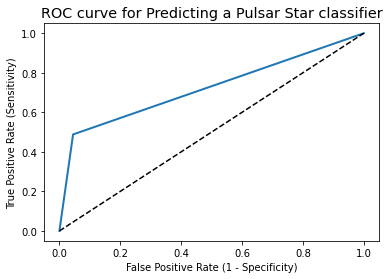

In [95]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [96]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test_bin, y_pred_bin)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7216


In [97]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')  # Usa 'weighted' si hay clases desbalanceadas
print(f'F1 Score: {f1:.4f}')


F1 Score: 0.7495


In [98]:
# Detener el medidor y obtener los resultados
tracker.stop()

[codecarbon INFO @ 22:10:06] Energy consumed for RAM : 0.003007 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:10:06] Energy consumed for all CPUs : 0.005012 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:10:06] 0.008018 kWh of electricity used since the beginning.


0.0016459104299754786